In [3]:
import pandas as pd
import glob

In [4]:
filename = '33. Courtenay_Meade_13.06.2018.xls'
path ='D:/001_Projects/01 - GIPTN/04 - Macro Model/Traffic Counts/2018/C1726_Traffic Counts/%s' % (filename)
cols = 'D,G,J,M,P,S,V,Y,AB,AE,AH,AK,AN'

In [5]:
def lees_data(path, cols):
    
    voertuigbewegings = pd.read_excel(path, skiprows = 17, nrows = 48, usecols = cols)
    voertuigbewegings.rename(columns={'-': 'TUID'}, inplace=True)
    voertuigbewegings = voertuigbewegings.set_index(['TUID'])

    df1 = pd.read_excel(path, nrows = 8, usecols = 'C:P', header = None)
    
    kruising_projekt, datum = df1[3][0], df1[12][4]
    kruising_projekt = kruising_projekt.split(":")
    kruising = kruising_projekt[0]
    projekt = kruising_projekt[1]
    
    A, B, C, D, = 'NOORD', 'OOS', 'SUID', 'WES'
    naame = [ (A,'REGS'), (A,'DEUR'), (A,'LINKS'), (B,'REGS'), (B,'DEUR'), (B,'LINKS'),
             (C,'REGS'), (C,'DEUR'), (C,'LINKS'), (D,'REGS'), (D,'DEUR'), (D,'LINKS')]

    voertuigbewegings.columns=pd.MultiIndex.from_tuples(naame)

    voertuigbewegings = pd.concat([voertuigbewegings], keys=[datum], names=['DATUM'], axis=1)
    voertuigbewegings = pd.concat([voertuigbewegings], keys=[kruising], names=['KRUISING'], axis=1)
    voertuigbewegings = pd.concat([voertuigbewegings], keys=[projekt], names=['PROJEKT'], axis=1)

    return voertuigbewegings

lees_data(path, cols)

PROJEKT          George CBD                                                  \
KRUISING Courtenay / Meade                                                    
DATUM          13 June 2018                                                   
                      NOORD             OOS            SUID             WES   
                       REGS DEUR LINKS REGS DEUR LINKS REGS DEUR LINKS REGS   
TUID                                                                          
06h15                     0    0     0    0   23     4    4    0     2    0   
06h30                     0    0     0    0   34     7    1    0     8   14   
06h45                     0    0     0    0   67    17    8    0    55   85   
07h00                     0    0     0    0  130    27   15    0    56  123   
07h15                     0    0     0    0  184    84   26    0    99  116   
07h30                     0    0     0    0  317   118   69    0    95   89   
07h45                     0    0     0    0  355    79   97    0    74   53   
08h00                     0    0     0    0  283   108   34    0    53   63   
08h15                     0    0     0    0  237    70   33    0    89   49   
08h30                     0    0     0    0  209    45   19    0    25    9   
08h45                     0    0     0    0  175    23   31    0    11   16   
09h00                     0    0     0    0  214   102   46    0    12   13   
09h15                     0    0     0    0  177    21   49    0    35 -569   
09h30                     0    0     0    0  189    42   27    0    20  620   
09h45                     0    0     0    0  261    67   54    0    47   52   
10h00                     0    0     0    0  222    59   41    0    40   36   
10h15                     0    0     0    0  217    49   31    0    27   26   
10h30                     0    0     0    0  246    47   37    0    39   42   
10h45                     0    0     0    0  209    39   52    0    70   36   
11h00                     0    0     0    0  220    30   56    0    37   40   
11h15                     0    0     0    0  222    22   58    0    57   23   
11h30                     0    0     0    0  275    25   52    0    98  100   
11h45                     0    0     0    0  282    51   63    0    29   18   
12h00                     0    0     0    0  256    34   43    0    45   29   
12h15                     0    0     0    0  150    33   59    0    41   59   
12h30                     0    0     0    0  293    50   54    0    57   56   
12h45                     0    0     0    0  224    50   49    0    64   73   
13h00                     0    0     0    0  267    73   50    0    71   83   
13h15                     0    0     0    0  281    50   61    0   107  102   
13h30                     0    0     0    0  323    49  116    0   152   58   
13h45                     0    0     0    0  291    23   62    0    80   36   
14h00                     0    0     0    0  277    36   56    0    38   52   
14h15                     0    0     0    0  317    32   39    0   102  113   
14h30                     0    0     0    0  188    27   39    0    74   48   
14h45                     0    0     0    0  238    47   35    0   111   48   
15h00                     0    0     0    0  246    33   54    0    54   32   
15h15                     0    0     0    0  214    35   59    0    29   15   
15h30                     0    0     0    0  221    31   36    0    58   48   
15h45                     0    0     0    0  243    45   41    0    27   32   
16h00                     0    0     0    0  222    33   41    0    34   74   
16h15                     0    0     0    0  261    28   57    0    77   39   
16h30                     0    0     0    0  307    37   64    0    38   42   
16h45                     0    0     0    0  284    20   77    0    59    9   
17h00                     0    0     0    0  206    27   70    0    54  353   
17h15                     0    0     0    0  409  

In [6]:
def beskrywings(path, cols):

    padbeskrywing = pd.read_excel(path, skiprows = 3, nrows = 4, usecols = 'D,G', header = None, names = ['BESKRYWING', 'STRAAT'])
    padbeskrywing['BESKRYWING'] = padbeskrywing['BESKRYWING'].str.split(' ',expand=True)
    
    return padbeskrywing

#beskrywings(path, cols)

In [7]:
path ='D:/001_Projects/01 - GIPTN/04 - Macro Model/Traffic Counts/2018/C1726_Traffic Counts/'
filenames = glob.glob(path + "/*.xls")

dfs = []
for filename in filenames:
    dfs.append(lees_data(filename, cols))

resultaat = pd.concat(dfs, axis=1)
resultaat['TOTAL']= resultaat.iloc[:, -len(resultaat.columns):].sum(axis=1)

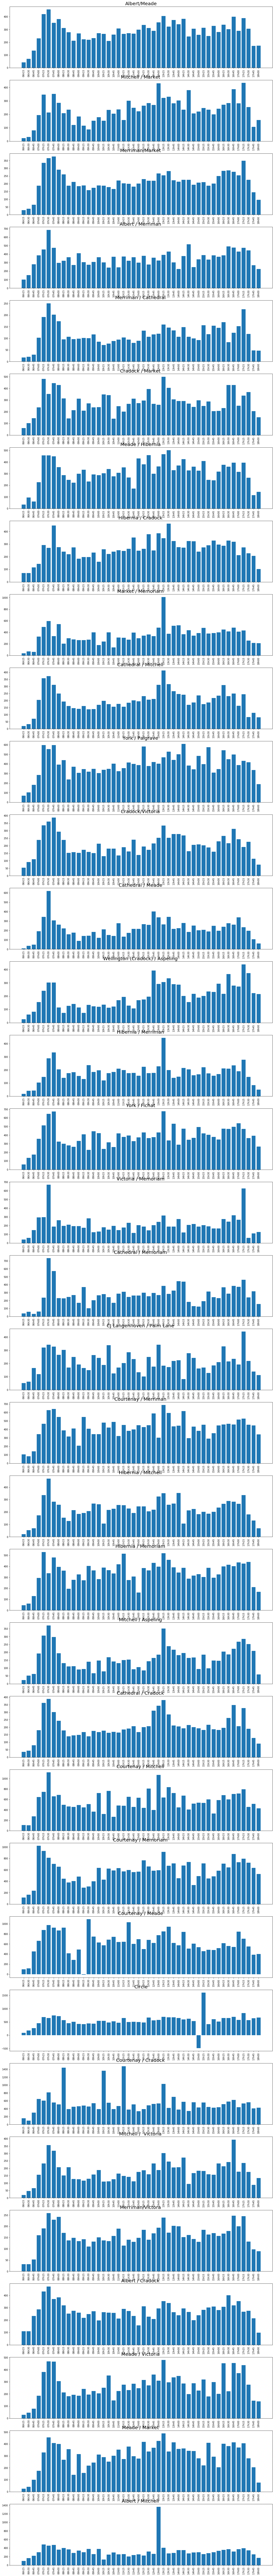

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 0
fig = plt.figure(figsize=(20,200))

for filename in filenames:
    filecount = lees_data(filename, cols)
    filecount['TOTAL']= filecount.iloc[:, -len(filecount.columns):].sum(axis=1)
    
    n = n + 1
    
    plt.subplot(35,1,n)
    plt.bar(filecount.index, filecount['TOTAL'])
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.title(list(filecount.columns.levels[1])[0], fontsize=20)
        
#plt.tight_layout()

In [9]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

data = [go.Bar(x=resultaat.index, y=resultaat['TOTAL'])]

layout = go.Layout(
    title='15 Min Count Data',
    xaxis=dict(
        title='Time Ending',
        titlefont=dict(
            family='Courier New, monospace',
            size=14,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Volume (15 mins)',
        titlefont=dict(
            family='Courier New, monospace',
            size=14,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='jupyter-basic_bar')

ModuleNotFoundError: No module named 'plotly'

In [8]:
resultaat_uureindig = resultaat.rolling(4).sum()

data = [go.Bar(x=resultaat_uureindig.index, y=resultaat_uureindig['TOTAL'])]

layout = go.Layout(
    title='Hourly Volume',
    xaxis=dict(
        title='Hour Ending',
        titlefont=dict(
            family='Courier New, monospace',
            size=14,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Total Vehicles Counted',
        titlefont=dict(
            family='Courier New, monospace',
            size=14,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='jupyter-basic_bar')

In [9]:
filename_resultaat = 'resultaat.csv'
path_resultaat ='D:/001_Projects/01 - GIPTN/04 - Macro Model/Traffic Counts/2018/C1726_Traffic Counts/%s' % (filename_resultaat)
resultaat.unstack().to_csv(path_resultaat, header = ['COUNT'])

filename_resultaat_uureindig = 'uureindig.csv'
path_resultaat_uureindig ='D:/001_Projects/01 - GIPTN/04 - Macro Model/Traffic Counts/2018/C1726_Traffic Counts/%s' % (filename_resultaat_uureindig)
resultaat_uureindig.unstack().to_csv(path_resultaat_uureindig, header = ['COUNT'])